# Efficient Frontier

The dataset ind30_m_vw_rets.csv is used here. It is from the Ken French Research Data website and it has monthly returns data from 1926 of 30 different industry portfolios. The data has 31 columns, extra column is the date. The returns are in percentage.

In [1]:
import pandas as pd
ind = pd.read_csv("ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100 
# divide by 100 as the numbers are in percentage
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [2]:
#The dates got pulled as int64.
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [3]:
ind.index = pd.to_datetime(ind.index.values, format="%Y%m").to_period('M')
ind.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [4]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [5]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [6]:
# There are spaces in the column names, which needs to be cleaned.
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [7]:
ind.shape

(1110, 30)

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
import risk_kit as kit

In [13]:
ind = kit.get_ind_returns()
ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
1926-12,-0.0051,-0.0409,0.0255,0.0217,0.0053,0.0256,0.0060,0.0011,0.0537,0.0643,...,0.0199,0.0621,0.0724,-0.0463,0.0359,0.0965,0.0057,0.0151,0.0268,-0.0234
1927-01,-0.0084,0.0057,-0.0035,0.0187,0.0967,0.0408,-0.0106,0.0505,0.0023,-0.0150,...,0.0188,0.0208,-0.0145,-0.0260,0.0144,-0.1793,-0.0270,0.0152,-0.0238,-0.0396
1927-02,0.0442,0.1283,0.0149,0.0164,0.0141,0.0457,0.0277,0.0171,0.0969,0.0774,...,0.0397,0.0890,0.0485,0.0546,0.0518,0.0349,0.0347,0.0686,0.0297,0.0028
1927-03,0.0209,-0.1356,0.0551,0.0102,-0.0028,-0.0008,0.0090,0.0101,0.0607,-0.0539,...,0.0556,-0.0780,0.0429,-0.0967,0.0106,-0.2047,-0.0030,-0.0242,0.0136,0.0218
1927-04,0.0272,0.0285,0.0401,-0.0377,-0.0096,0.0144,0.0595,0.0274,0.0295,0.0054,...,-0.0213,0.0344,0.0310,0.0493,0.0074,-0.1075,0.0438,0.0656,0.0289,0.0527


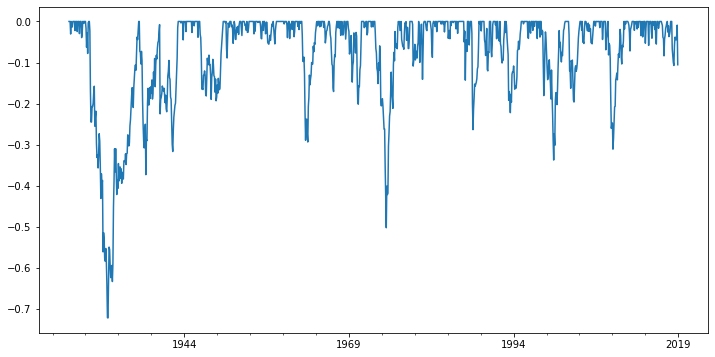

In [14]:
# Compute drawdowns for the column Food
kit.drawdown(ind["Food"])["Drawdowns"].plot.line(figsize=(12,6))

In [15]:
#Compute Var_Gaussian for some columns
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
kit.var_gaussian(ind[cols_of_interest], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

From this, the value at risk for Beer is not that bad, tobacco is pretty bad.

In [16]:
# To find VaR for all columns
kit.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

Mines, Games have very high VaR.

In [17]:
kit.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

Beer, Coal etc have low VaR.

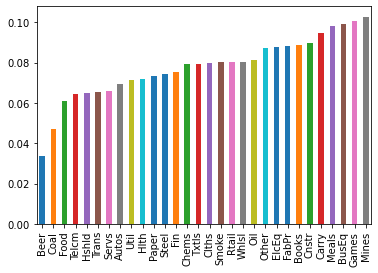

In [18]:
kit.var_gaussian(ind, modified=True).sort_values().plot.bar()

In [19]:
# Compute some statistics for this data

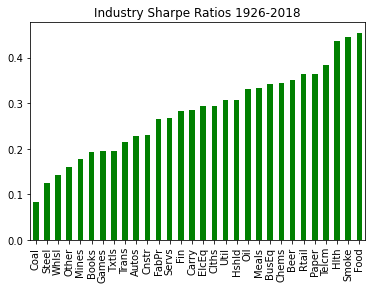

In [20]:
# Sharpe Ratio
kit.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title= "Industry Sharpe Ratios 1926-2018", color="green")

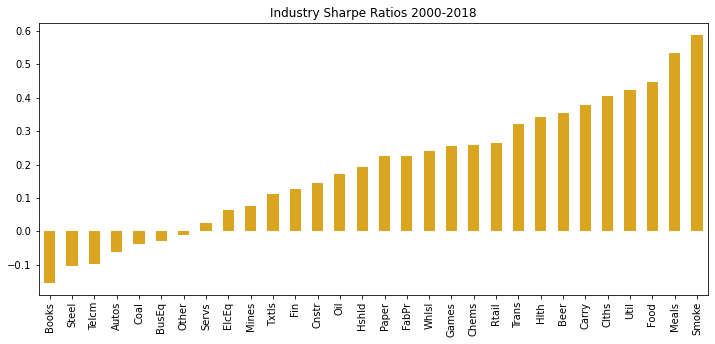

In [21]:
# Sharpe Ratio from 2000 onwards
kit.sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title= "Industry Sharpe Ratios 2000-2018", figsize=(12,5), color="goldenrod")

There are some negative Sharpe ratios which are not good, the portfolio has returned lower than the risk free rate. 

## EFFICIENT FRONTIER

To compute the efficient frontier, we need two things, a set of expected returns and the mean in covariance matrix. Once we have the correlations and volatilities which are basically embedded in the covariance matrix, and we have the expected returns, we can generate the efficient frontier. It is difficult to find the forecast for the expected returns. So we are going to look into this as an in-sample exercise, meaning, what was the efficient frontier than calculating the forecast.

In [22]:
# Compute the efficient frontier for 1995 to 2000
## first find expected returns ( here from historic data for now)
er = kit.annualize_rets(ind["1995":"2000"], 12)

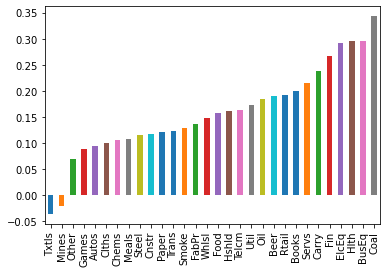

In [23]:
er.sort_values().plot.bar()

In [24]:
# Now, we have to generate the covariance matrix
cov = ind["1995":"2000"].cov()

In [25]:
cov.shape

(30, 30)

In [26]:
#Covariance matrix is a square matrix ( it has as many rows an columns as your assets). 
#It is also symmetric (covariance between food and beer is same as covariance between beer and food). 
#It is symmetric about the diagonal. The covariance of the return series with itself is just the variance.
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


Portfolio corresponds to simply an allocation of capital. The weights are basically what determines how much money to be put in each asset. So first we need to see every possible portfolio which represents a possible allocation of weights, in the risk-return axis.

In [27]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.157362
Beer     0.190134
Smoke    0.129288
Coal     0.343089
dtype: float64

In [28]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002287,0.002077,0.001757,0.000034
Beer,0.002077,0.004599,0.001143,0.001261
Smoke,0.001757,0.001143,0.007130,-0.000544
Coal,0.000034,0.001261,-0.000544,0.016153


In [50]:
import numpy as np
weights = np.repeat(1/4,4) # Generate an array with .25 in each 4 assets

In [51]:
weights

array([0.25, 0.25, 0.25, 0.25])

In [52]:
kit.portfolio_return(weights, er[l])

0.20496820684146116

In [57]:
import risk_kit as kit
kit.portfolio_vol(weights, cov.loc[l,l])


0.05100412722141178

## 2 ASSET FRONTIER

In [58]:
# 2 assets that are used here.
l = ["Games", "Fin"]

In [59]:
# number of points = 20
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]  # linearly spaced between 0 and 1 with n_points 
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

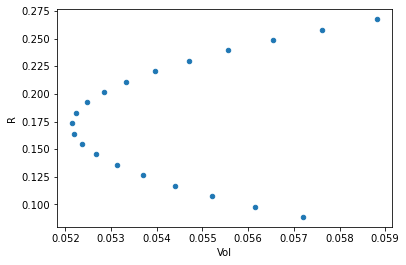

In [60]:
returns = [kit.portfolio_return(w, er[l]) for w in weights]
volatilities = [kit.portfolio_vol(w, cov.loc[l,l]) for w in weights]
efficient_frontier_df = pd.DataFrame({"R":returns, "Vol":volatilities})
efficient_frontier_df.plot.scatter(x="Vol", y="R")

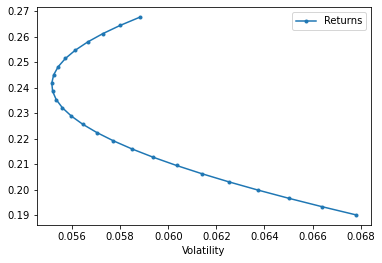

In [61]:
l = ["Fin", "Beer"]
kit.plot_ef2(25, er[l], cov.loc[l,l])